In [42]:
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import seaborn as sns
import matplotlib as plt

In [2]:
pd.__version__

'1.4.2'

## Q1. Downloading the data

In [3]:
df1 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df2 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [9]:
df1.shape[1]

19

## Q2. Computing duration

In [18]:
df1["duration"] = (df1["tpep_dropoff_datetime"] -
                       df1["tpep_pickup_datetime"]).dt.total_seconds()/60

In [19]:
df1["duration"].std()

42.594351241920904

In [24]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'duration'],
      dtype='object')

## Q3. Dropping outliers

In [23]:
df = df1[(df1.duration >= 1) & (df1.duration <= 60)].copy()
len(df)/len(df1)

0.9812202822125979

## Q4. One-hot encoding

In [25]:
categorical = ['PULocationID', 'DOLocationID']
df[categorical] = df[categorical].astype(str)

In [ ]:
train_dicts = df[categorical].to_dict(orient='records')

In [31]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [32]:
X_train.shape

(3009173, 515)

## Q5. Training a model

In [43]:

target = 'duration'
y_train = df[target].values
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

print(f'Train RMSE: {root_mean_squared_error(y_train, y_pred)}')

Train RMSE: 7.649262444548727


TypeError: 'module' object is not callable

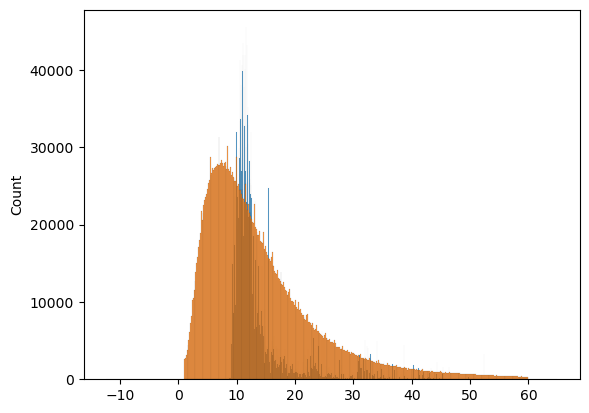

In [40]:


sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='actual')

plt.legend()

## Q6. Evaluating the model

In [ ]:


categorical = ['PULocationID', 'DOLocationID']


def read_data(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].astype('str')

    return df

In [ ]:


df_val = read_data(
    'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [ ]:
val_dicts = df_val[categorical].to_dict(orient='records')

X_val = dv.transform(val_dicts)
y_val = df_val.duration.values
y_pred = lr.predict(X_val)

In [ ]:
root_mean_squared_error(y_val,y_pred)